# <a name="0">K means - EM</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

//so much object-type data


In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [6]:
#checking for any duplicate countires
df[df.duplicated(keep=False)]
#none were found

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [7]:
# grouping all the countries with any missing data into the data freme "missing_df"
missing_df = df[df.isna().any(axis=1)]

In [8]:
missing_df.shape

(48, 20)

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
#### 1- need to convert object-type data into numrical data        <br>
#### 2- some columns have null values for different countries      <br>
I think the best approach is to try to predict the missing values using ML models such as linear regression, if this's not possible or time consuming for such assignment, I'll just fill in the missing data with the average which's probabily not a good idea           <br>
#### 3- can't do visuallization on non numerical-type data         <br>

In [9]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [10]:
#solution 
# first we get a list of all columns names to loop through:
cols = df.columns

# a function that converts "," >> "."
def convert_to_numerical(value):
    output = value
    if ',' in str(value):
        output = str(value).replace(',', '.')        
    return float(output)

# we apply the function to all columns except the first two since they don't contain any numeric values
for i in cols[2:]:
    df[i] = df[i].apply(lambda x: convert_to_numerical(x))

In [11]:
#test 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Second issue**

## as I mentioned above, my initial idea was to make different predictors to estimate the missing values in each column, but this has turned out to be a terrible idea. so you can just skip the following couple of cells and go straight to <a href="#imputer">this cell</a>

In [12]:
#solution 
df_full = df.dropna()
df_full["Climate"] = df_full["Climate"].astype(int) #changing climate to integer since it's a categorical variable
df_full.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    float64
 3   Area (sq. mi.)                      179 non-null    float64
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### creating different models to predict the columns with missing data above 2%. the rest I'll just fill it with the average.

In [14]:

X_full, climate_full = df_full.iloc[:,2:20] ,df_full.iloc[:,14]
literacy_full, agriculture_full = df_full.iloc[:,9], df_full.iloc[:,17]
industry_full, service_full = df_full.iloc[:,18], df_full.iloc[:,19]


### 1) climate_predictor

In [15]:
X_train, X_test, climate_train, climate_test = train_test_split(X_full[X_full.columns.drop('Climate')], climate_full ,test_size=0.25, shuffle=True, 
                                         random_state=13,stratify=climate_full)


In [16]:
# C_values = [0.001, 0.01, 0.1, 1, 5, 10, 20, 100]
# max_iter_values = [100, 200, 400, 800]

# best_scores = []
# different_parameters = []
# for i in C_values:
#     for j in max_iter_values:
#         climate_predictor = LogisticRegression(random_state=13, max_iter=j, C=i, penalty='l2', solver='newton-cg')
#         climate_predictor.fit(X_train,climate_train)
#         log_scores = accuracy_score(climate_test, climate_predictor.predict(X_test))
#         best_scores.append(log_scores)
#         different_parameters.append(str(i) + ", " + str(j))
# print(best_scores)

In [17]:
# plt.figure(figsize=(25,5))
# plt.plot(different_parameters, best_scores)
# plt.xlabel("Different parameters values (C, max_itr)")
# plt.ylabel("test-train split Accuracy")

#### nice looking zigzag.  best parameters to predict the climate of missing countries are c = 0.1 , max_iter = 200. this is probably is as good as blindfold guessing the values, but with more steps.

In [18]:
# df['climate_pred'] = climate_predictor.predict(df.drop(['Climate', 'Country', 'Region'], axis = 1))

# df['climate_LM'] = np.where(df['Climate']>0, X['Climate'], df['climate_pred'])


### 2) literacy_predictor

In [19]:
X_train, X_test, literacy_train, literacy_test = train_test_split(X_full[X_full.columns.drop('Literacy (%)')], literacy_full ,test_size=0.25, shuffle=True, 
                                         random_state=13)

In [20]:
X_train

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
54,5450661.0,43094.0,126.5,16.97,2.48,4.56,31100.0,614.6,54.02,0.19,45.79,3,11.13,10.36,0.018,0.246,0.735
132,3177388.0,1030700.0,3.1,0.07,0.00,70.89,1800.0,12.9,0.48,0.01,99.51,1,40.99,12.16,0.250,0.290,0.460
11,20264082.0,7686850.0,2.6,0.34,3.98,4.69,29000.0,565.5,6.55,0.04,93.41,1,12.14,7.51,0.038,0.262,0.700
109,23113019.0,120540.0,191.8,2.07,0.00,24.04,1300.0,42.4,20.76,2.49,76.75,3,15.54,7.13,0.300,0.340,0.360
84,12293545.0,108890.0,112.9,0.37,-1.67,35.93,4100.0,92.1,12.54,5.03,82.43,2,29.88,5.20,0.227,0.188,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,33987.0,160.0,212.4,0.00,4.85,4.70,25000.0,585.5,25.00,0.00,75.00,4,10.21,7.18,0.060,0.390,0.550
19,10379067.0,30528.0,340.0,0.22,1.23,4.68,29100.0,462.6,23.28,0.40,76.32,3,10.38,10.27,0.010,0.240,0.749
89,8308504.0,27750.0,299.4,6.38,-3.40,73.45,1600.0,16.9,28.30,11.61,60.09,2,36.44,12.17,0.280,0.200,0.520
224,21456188.0,527970.0,40.6,0.36,0.00,61.50,800.0,37.2,2.78,0.24,96.98,1,42.89,8.30,0.135,0.472,0.393


In [21]:
literacy_test.mean()

86.41999999999999

In [22]:
from sklearn.linear_model import LinearRegression

literacy_predictor = LinearRegression(normalize=True)
literacy_predictor.fit(X_train, literacy_train)

LinearRegression(normalize=True)

16.488714978794153


Text(0, 0.5, 'predicted values')

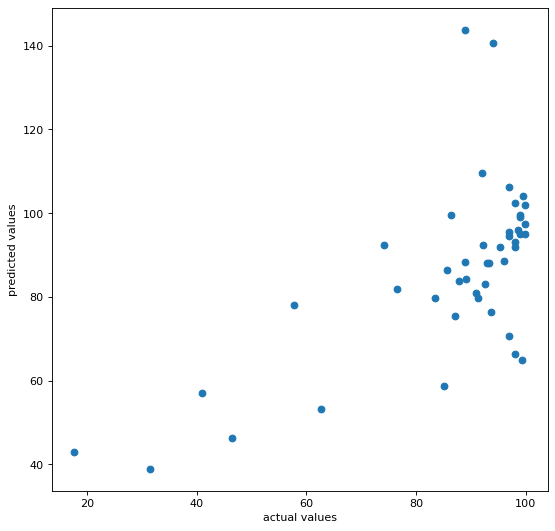

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
literacy_pred = literacy_predictor.predict(X_test)
print(mean_squared_error(literacy_test, literacy_pred, squared=False))

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(literacy_test , literacy_pred, marker='o', linestyle='')
plt.xlabel("actual values")
plt.ylabel("predicted values")

#### call it laziness but this plot is good enough for me and I think it's still better than just filling with average

### 3) agriculture_predictor

In [24]:
X_train, X_test, agriculture_train, agriculture_test = train_test_split(X_full[X_full.columns.drop('Agriculture')], agriculture_full ,test_size=0.25, shuffle=True, 
                                         random_state=13)

In [25]:
agriculture_predictor = LinearRegression( normalize=True)
agriculture_predictor.fit(X_train, agriculture_train)

LinearRegression(normalize=True)

0.00019819178469848153


Text(0, 0.5, 'predicted values')

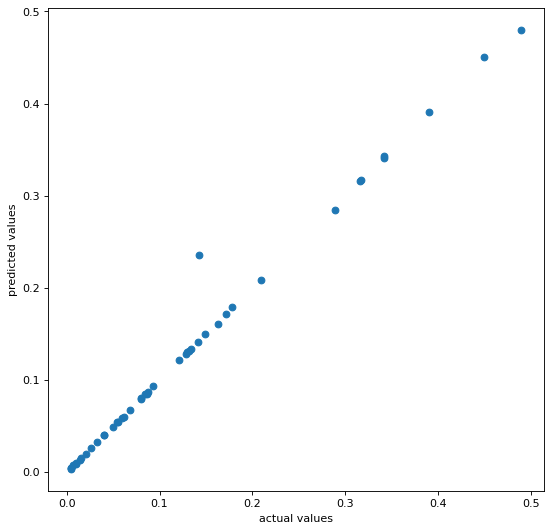

In [26]:
agriculture_pred = agriculture_predictor.predict(X_test)
print(mean_squared_error(agriculture_test, agriculture_pred, squared=True))

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(agriculture_test , agriculture_pred, marker='o', linestyle='')
plt.xlabel("actual values")
plt.ylabel("predicted values")

### 4) industry_predictor

In [27]:
X_train, X_test, industry_train, industry_test = train_test_split(X_full[X_full.columns.drop('Industry')], industry_full ,test_size=0.25, shuffle=True, 
                                         random_state=13)

In [28]:
industry_predictor = LinearRegression( normalize=True)
industry_predictor.fit(X_train, industry_train)

LinearRegression(normalize=True)

0.00019846354305773993


Text(0, 0.5, 'predicted values')

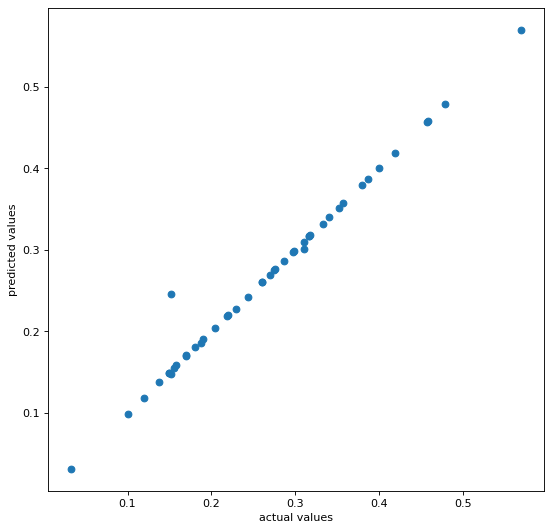

In [29]:
industry_pred = industry_predictor.predict(X_test)
print(mean_squared_error(industry_test, industry_pred, squared=True))

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(industry_test , industry_pred, marker='o', linestyle='')
plt.xlabel("actual values")
plt.ylabel("predicted values")

### 5) service_predictor

In [30]:
X_train, X_test, service_train, service_test = train_test_split(X_full[X_full.columns.drop('Service')], service_full ,test_size=0.25, shuffle=True, 
                                         random_state=12)

In [31]:
service_predictor = LinearRegression( normalize=False)
service_predictor.fit(X_train, service_train)

LinearRegression()

In [32]:
service_train.mean()

0.551865671641791

In [33]:
service_test.mean()

0.5623777777777778

0.00019772412506950763


Text(0, 0.5, 'predicted values')

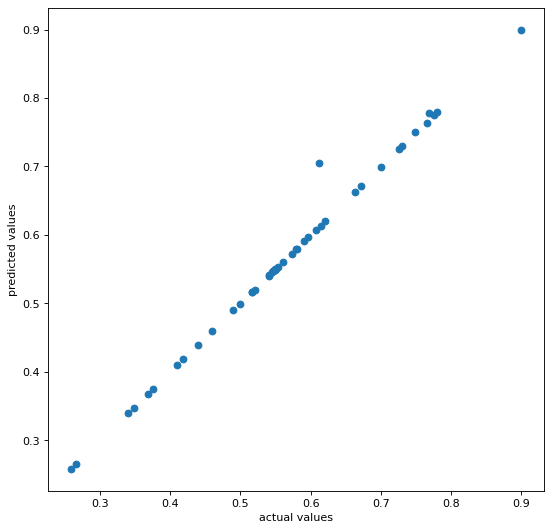

In [34]:
service_pred = service_predictor.predict(X_test)
print(mean_squared_error(service_test, service_pred, squared=True))

plt.figure(figsize=(8, 8), dpi=80)
plt.plot(service_test , service_pred, marker='o', linestyle='')
plt.xlabel("actual values")
plt.ylabel("predicted values")

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

<a name="imputer"></a>
#### after realizing my failed attempt to do the manual labor, I found the following code segment to work just fine to fill all the missing data .
(+3 houres of work gone with the wind)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(df.drop(['Country', 'Region'], axis = 1))

new_df = df
new_df=pd.DataFrame(imp_mean.transform(df.drop(['Country', 'Region'], axis = 1)))
new_df.columns = df.drop(['Country', 'Region'], axis = 1).columns

In [36]:
#test 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    float64
 1   Area (sq. mi.)                      227 non-null    float64
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       227 non-null    float64
 5   Infant mortality (per 1000 births)  227 non-null    float64
 6   GDP ($ per capita)                  227 non-null    float64
 7   Literacy (%)                        227 non-null    float64
 8   Phones (per 1000)                   227 non-null    float64
 9   Arable (%)                          227 non-null    float64
 10  Crops (%)                           227 non-null    float64
 11  Other (%)                           227 non-n

In [37]:
new_df["Climate"] = new_df["Climate"].astype(int)

#### before scaling the features, now that all the features are of numeric type let's see the distribution of the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EE78D1760>,
      dtype=object)

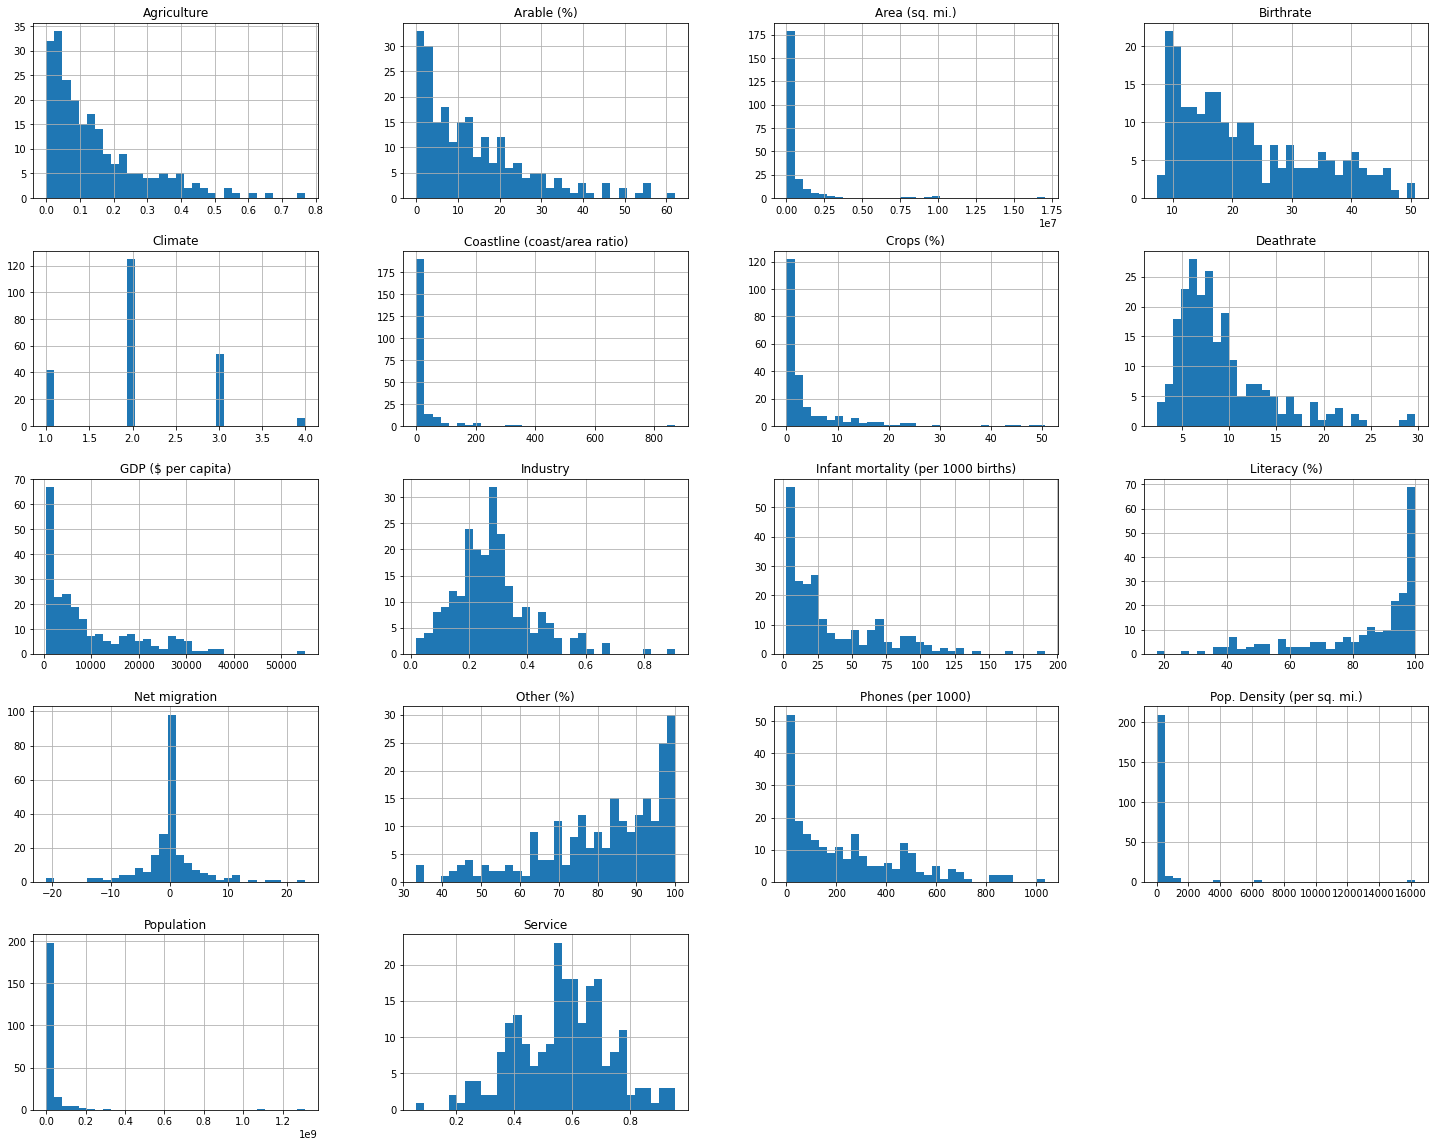

In [38]:
new_df.hist(bins=32, figsize=(25, 20))

In [39]:
new_df.describe()


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,-0.014230,35.439153,9673.757709,83.360326,236.687678,13.790203,4.544384,81.662353,2.105727,22.074448,9.200161,0.147897,0.281910,0.569070
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.887761,35.188025,10029.802344,19.230752,227.002797,12.982818,8.327117,16.071289,0.720934,11.123290,4.956569,0.142727,0.134073,0.161160
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-1.135000,8.215000,1900.000000,75.300000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.038000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.030000,5600.000000,92.500000,176.200000,10.530000,1.080000,85.380000,2.000000,18.790000,7.840000,0.100000,0.270910,0.580000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,98.000000,389.650000,20.000000,4.435000,95.230000,3.000000,29.770000,10.580000,0.211000,0.338000,0.675635
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [40]:
# new_df['Agriculture'] = new_df['Agriculture'] + 1
# new_df['Crops (%)'] = new_df['Crops (%)'] + 1
# new_df['Arable (%)'] = new_df['Arable (%)'] + 1
# new_df['Net migration'] = new_df['Net migration'] + 21
# new_df['Coastline (coast/area ratio)'] = new_df['Coastline (coast/area ratio)'] + 1
# new_df['Pop. Density (per sq. mi.)'] = new_df['Pop. Density (per sq. mi.)'] + 1
new_df.info()

# my initial itention was to use log transformation.
# that's why i added some constants on the columns that contain 0 or negatives in them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    float64
 1   Area (sq. mi.)                      227 non-null    float64
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       227 non-null    float64
 5   Infant mortality (per 1000 births)  227 non-null    float64
 6   GDP ($ per capita)                  227 non-null    float64
 7   Literacy (%)                        227 non-null    float64
 8   Phones (per 1000)                   227 non-null    float64
 9   Arable (%)                          227 non-null    float64
 10  Crops (%)                           227 non-null    float64
 11  Other (%)                           227 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

### I used log transformation and imported robust scaler from scikit learn, and both gave almost identical resultes for the k-means algorithm (over 95% of the data in one cluster). using standardScaler not only has the SSE gotten much lower, but also there seems to be more realistic percentage of data in each cluster.

In [41]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(new_df)


from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# scaler = RobustScaler()
scaler = StandardScaler()
# standard_scaled = new_df.copy()

# log_scaled_df = new_df.copy()
scaled_df = new_df.copy()


# log_scaled_df[new_df.columns] = np.log(new_df[new_df.columns])
# log_scaled_df
scaled_df[new_df.columns] = scaler.fit_transform(new_df[new_df.columns])
scaled_df



,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.731251,3.635126,-0.896687,-2.468182,-1.030840,-0.128160,-0.520461,0.373391,-1.537132,2.209756,2.252457,1.629794,-0.313281,-1.175777
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.007953,-0.396439,-0.516978,0.163624,-0.730623,0.563509,-0.014970,-0.447270,1.243178,-0.627498,-0.804782,0.590558,-0.701987,0.061751
2,0.035618,0.998421,-0.220490,-0.292889,-0.077050,-0.126434,-0.367094,-0.696273,-0.700159,-0.815968,-0.516850,0.927150,-1.537132,-0.444594,-0.928123,-0.329307,2.377762,-1.685713
3,-0.243834,-0.334779,-0.053514,0.514709,-4.243560,-0.745338,-0.167247,0.710831,0.100716,-0.292585,1.258385,-0.415466,-0.146977,0.034738,-1.199069,-0.449521,-0.090821,0.482261
4,-0.243720,-0.334629,-0.137002,-0.293443,1.356213,-0.894012,0.931908,0.867176,1.150153,-0.893163,-0.546939,1.005101,1.243178,-1.204139,-0.596518,-0.847099,-0.024218,0.695191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,0.613951,-0.450554,-0.886694,-0.237453,-0.403915,0.240061,1.736195,-1.093322,1.243178,0.864561,-1.067640,-0.406547,-0.014276,0.378906
223,-0.242004,-0.185982,-0.228217,-0.287620,-0.384227,-0.114361,-0.362797,0.440563,-0.320998,-1.062992,-0.546939,1.142293,-1.537132,-0.461047,-0.369226,-0.131290,1.272042,-1.051403
224,-0.061923,-0.039330,-0.204312,-0.288452,0.002918,0.742254,-0.886694,-1.728149,-0.880732,-0.849934,-0.518054,0.955213,-1.537132,1.875484,-0.182011,-0.090563,1.420947,-1.094934
225,-0.146545,0.086427,-0.219584,-0.293443,0.002918,1.505275,-0.886694,-0.143854,-1.008766,-0.517995,-0.543329,0.700783,-0.146977,1.705195,2.169556,0.506295,0.060475,-0.497935


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018EE839F850>,
      dtype=object)

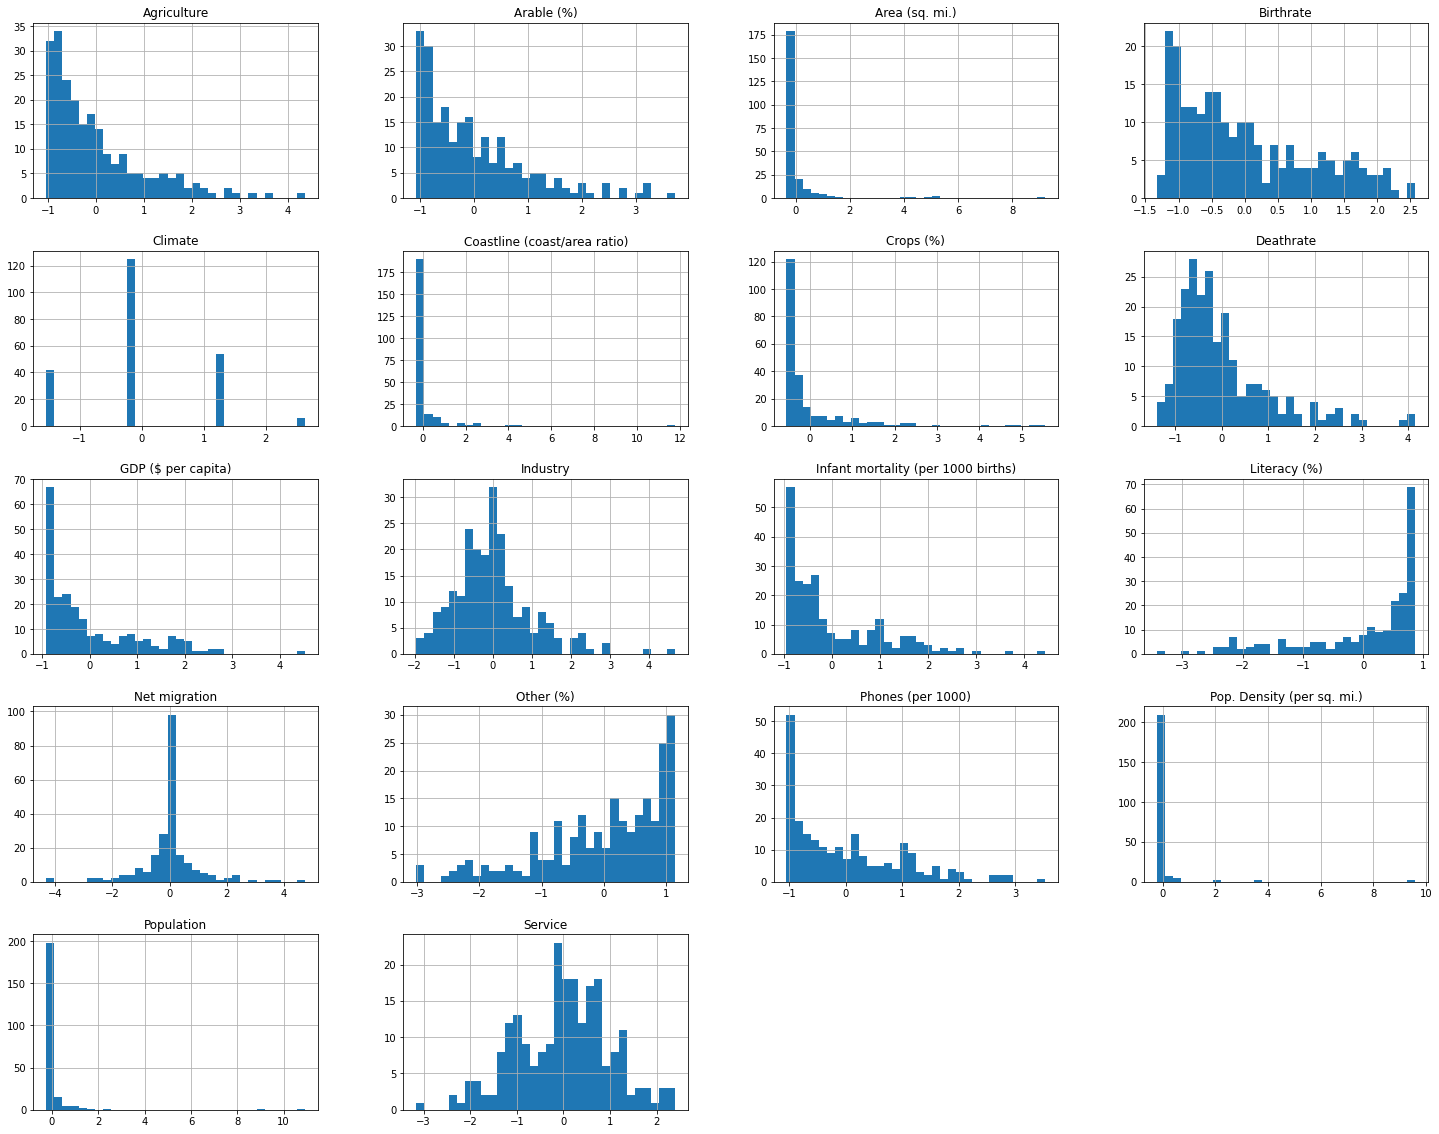

In [42]:
# df_scaled = pd.DataFrame(scaler.transform(new_df))
# df_scaled.columns = df.columns
scaled_df.hist(bins=32, figsize=(25, 20))

In [43]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    float64
 1   Area (sq. mi.)                      227 non-null    float64
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       227 non-null    float64
 5   Infant mortality (per 1000 births)  227 non-null    float64
 6   GDP ($ per capita)                  227 non-null    float64
 7   Literacy (%)                        227 non-null    float64
 8   Phones (per 1000)                   227 non-null    float64
 9   Arable (%)                          227 non-null    float64
 10  Crops (%)                           227 non-null    float64
 11  Other (%)                           227 non-n

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
- Number of clusters


### *Number of clusters*
Use elbow method to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

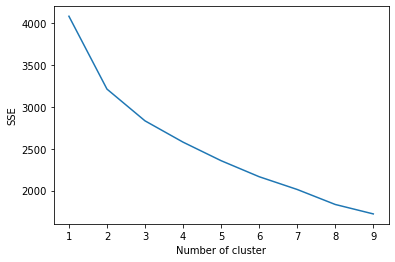

In [44]:
#training
#import k means
from sklearn.cluster import KMeans

sse = {}
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(scaled_df)
#     scaled_df["clusters"] = kmeans.labels_
#     print(log_scaled_df["clusters"])
    sse[i] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

no 100% clear elbow but let's take 2 or 3 as optimum k

In [45]:
# lable = kmeans.fit_predict(scaled_df)
# scaled_df["clusters"] = kmeans.labels_
# kmeans.labels_
 
kmeans = KMeans(n_clusters= 3)
 
kmeans.fit_predict(scaled_df)
kmeans.cluster_centers_



array([[ 0.13501257,  0.01785267, -0.11638218,  0.03241437, -0.43227347,
        -0.26072372, -0.36836408,  0.20067258, -0.30545276, -0.05737757,
         0.40742287, -0.16463393, -0.2386353 , -0.11854116, -0.55473033,
        -0.15294667,  0.31210154, -0.13339866],
       [-0.10775966,  0.03614998,  0.27625695,  0.17017295,  0.47649039,
        -0.7858759 ,  1.06759316,  0.72449894,  1.13410419,  0.16963518,
        -0.30419033,  0.02057436,  0.69443283, -0.89118288, -0.16365354,
        -0.70277281, -0.30969586,  0.88782508],
       [-0.06827351, -0.07286652, -0.1734125 , -0.26471419,  0.05206027,
         1.39087378, -0.79359915, -1.22205207, -0.97326195, -0.12784858,
        -0.23261693,  0.22363394, -0.51768472,  1.30861907,  1.04863548,
         1.12214801, -0.08107259, -0.92225712]])

### plotting the countries againnst 2 arbitrary features for visuallization

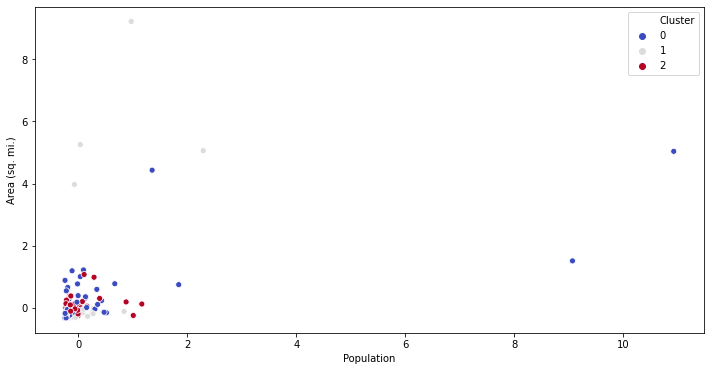

In [46]:
scaled_df['Cluster'] = kmeans.labels_
plt.subplots(figsize=(12,6))
sns.scatterplot(x='Population',y='Area (sq. mi.)', hue='Cluster', data=scaled_df, markers='*', palette='coolwarm')

In [47]:
#import EM
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(scaled_df)

GaussianMixture(n_components=3, random_state=0)

### plotting the countries againnst 2 arbitrary features for visuallization

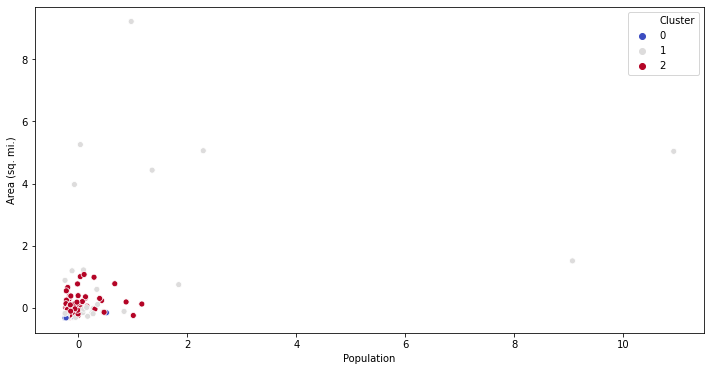

In [48]:
scaled_df['Cluster']=gm.fit_predict(scaled_df)
plt.subplots(figsize=(12,6))
sns.scatterplot(x='Population',y='Area (sq. mi.)', hue='Cluster', data=scaled_df, markers='*', palette='coolwarm')

In [49]:
scaled_df['Country'] = df['Country']

In [50]:
cluster0 = pd.DataFrame({
    'Cluster 0': [],
    })
cluster1 = pd.DataFrame({
    'Cluster 1': [],
    })
cluster2 = pd.DataFrame({
    'Cluster 2': [],
    })


for index, row in scaled_df.iterrows():
    if(row['Cluster'] == 0):
        new_row = {'Cluster 0' : scaled_df.iloc[index]['Country'] }
        cluster0 = cluster0.append(new_row, ignore_index=True)        
    elif(row['Cluster'] == 1):
        new_row = {'Cluster 1' : scaled_df.iloc[index]['Country'] }
        cluster1 = cluster1.append(new_row, ignore_index=True)         
    elif(row['Cluster'] == 2):
        new_row = {'Cluster 2' : scaled_df.iloc[index]['Country'] }
        cluster2 = cluster2.append(new_row, ignore_index=True)     

        
print("Countries in each cluster(using EM):-")
display(cluster0.head(20))
display(cluster1.head(20))
display(cluster2.head(20))

Countries in each cluster(using EM):-


,Cluster 0
0,American Samoa
1,Comoros
2,Cook Islands
3,Dominica
4,Gaza Strip
5,Grenada
6,Kiribati
7,Lebanon
8,Maldives
9,Marshall Islands


,Cluster 1
0,Andorra
1,Anguilla
2,Antigua & Barbuda
3,Argentina
4,Aruba
5,Australia
6,Austria
7,"Bahamas, The"
8,Bahrain
9,Barbados


,Cluster 2
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Armenia
5,Azerbaijan
6,Bangladesh
7,Benin
8,Bhutan
9,Bolivia


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 